# Premières manipulations des données

In [1]:
#Import
import pandas as pd
import numpy as np
import operator

#Train et test
from sklearn.model_selection import train_test_split

In [2]:
#Import des jeux de données de Toulouse et du Languedoc
path_jeu1 = 'C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID/Interpromo/PIP_2022NA/DATA1/DATA1/DONNEES_BRUTES/'
df_jeu1_toulouse = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_TOULOUSE.csv')

df_jeu1_languedoc = pd.read_csv(path_jeu1 + 'DATA_FRAUDE_LANGUEDOC.csv')

In [ ]:
#Import du jeu de données complet
data1 = pd.read_csv('C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID\Interpromo\PIP_2022NA\DATA1\DATA1\DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv')
data1

## Statistiques descriptives##

In [17]:
import matplotlib.pyplot as plt

### Proportion des clients par profils (hyper actifs, très peu actifs, ...)

In [24]:
df_jeu1_toulouse['profil'] = df_jeu1_toulouse['profil'].apply(lambda x:str(x))
df_jeu1_languedoc['profil'] = df_jeu1_languedoc['profil'].apply(lambda x:str(x))

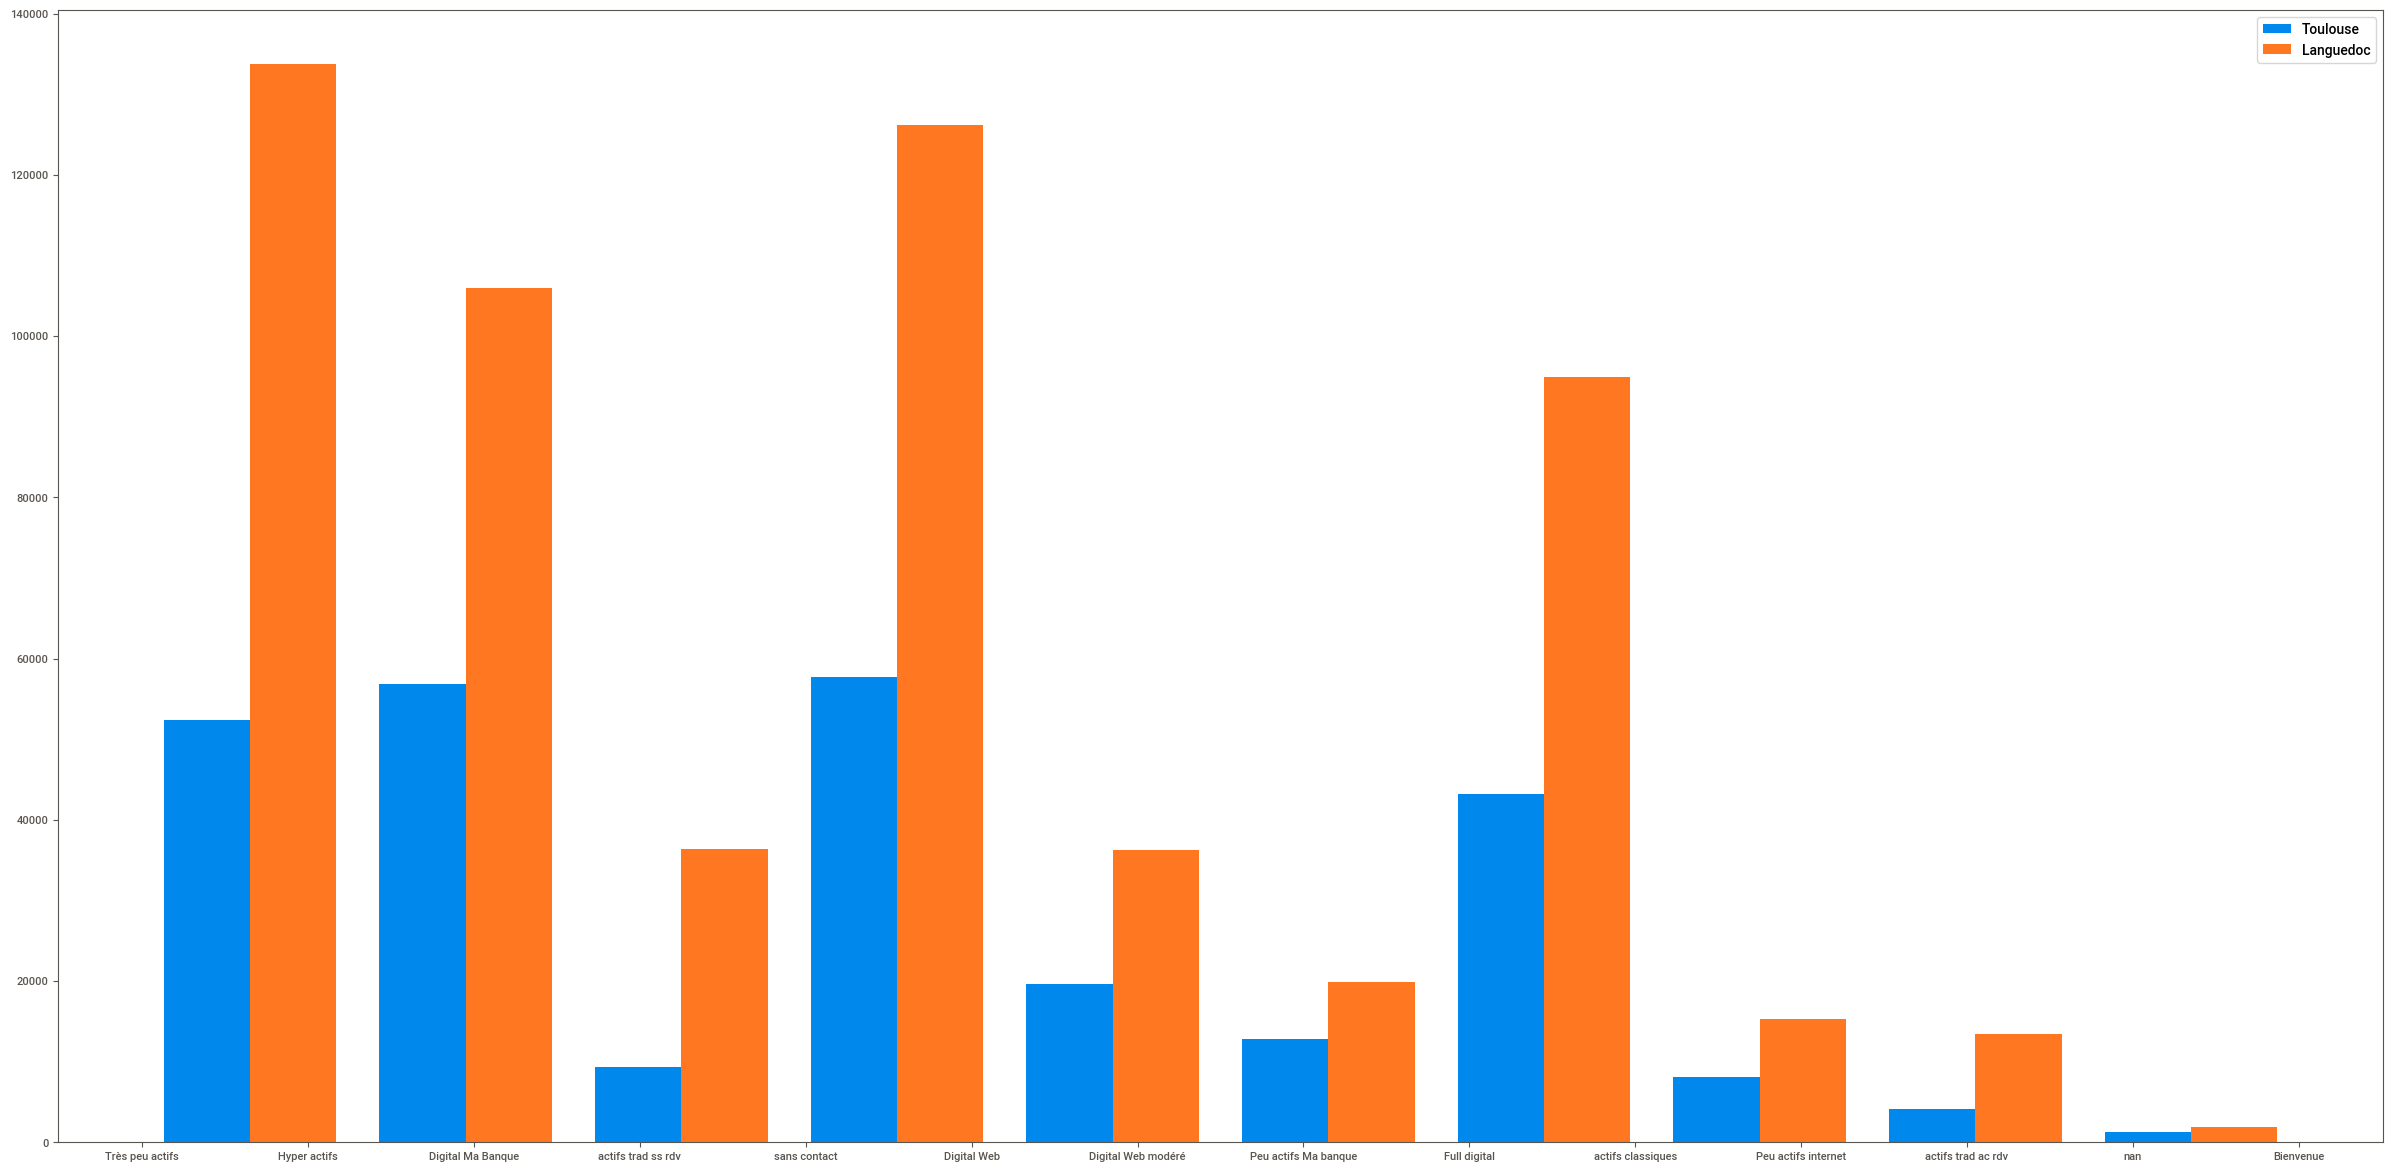

In [28]:
#En effectifs
plt.figure(figsize=(30,15))
plt.hist([df_jeu1_toulouse['profil'], df_jeu1_languedoc['profil']], label=['Toulouse', 'Languedoc'])
plt.legend()
plt.show()

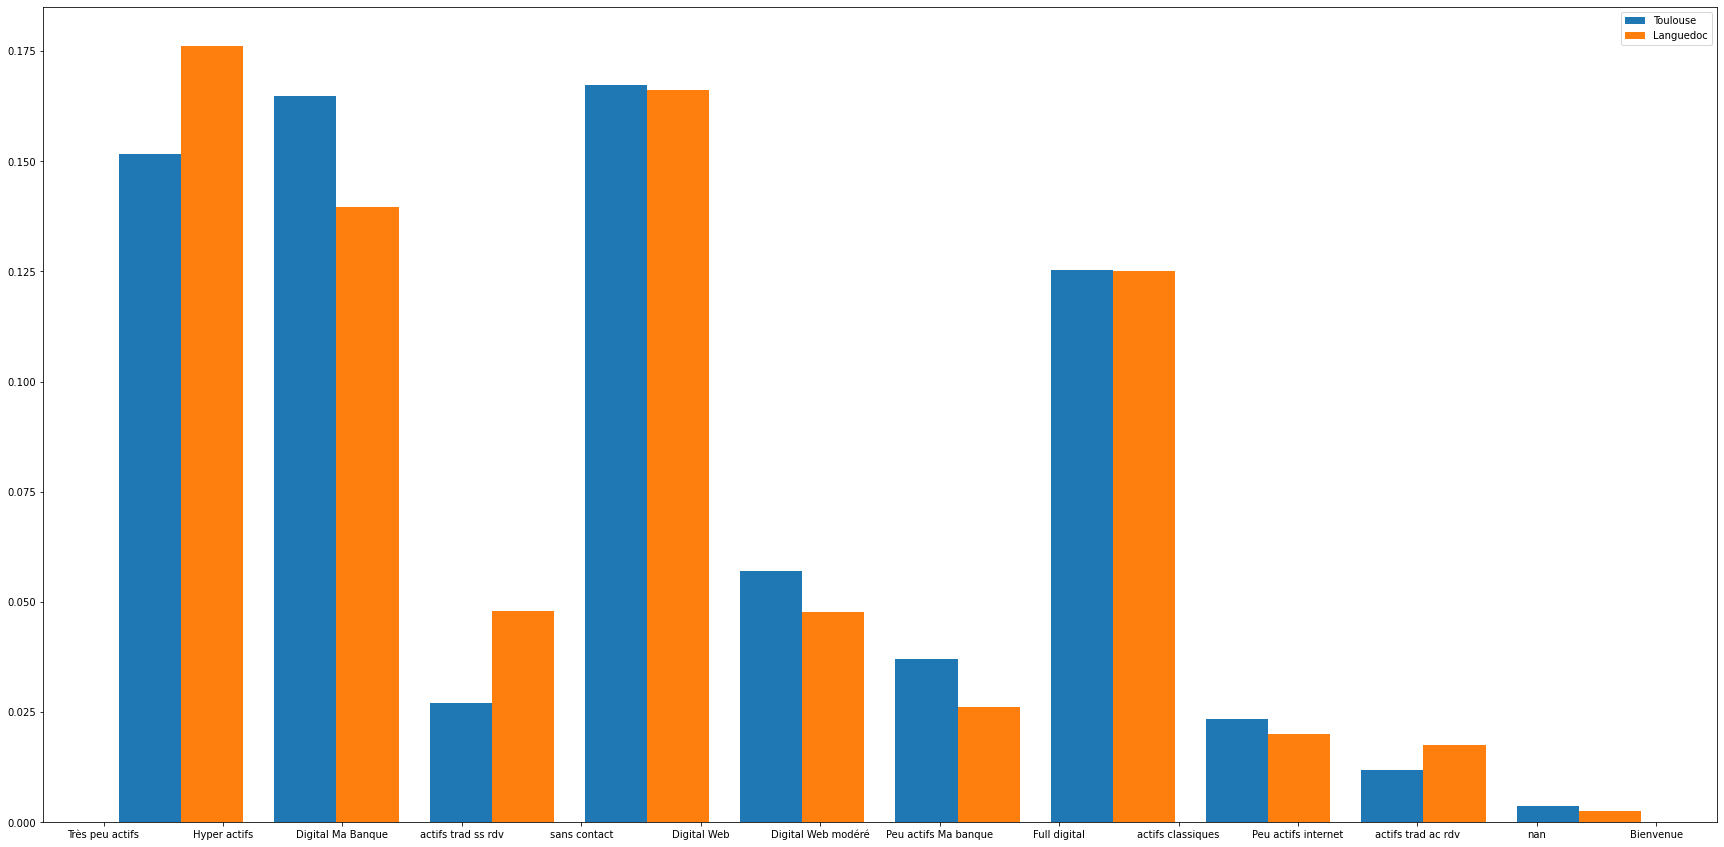

In [25]:
#En pourcentage
plt.figure(figsize=(30,15))
plt.hist([df_jeu1_toulouse['profil'], df_jeu1_languedoc['profil']], label=['Toulouse', 'Languedoc'], density=True)
plt.legend()
plt.show()

## Sweetviz

In [20]:
#!pip install sweetviz

In [21]:
import sweetviz as sv

In [24]:
my_report = sv.analyze(data1, pairwise_analysis='off')
my_report.show_html("MyReport.html")


Report MyReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Corrélations

In [6]:
import seaborn as sns

In [4]:
#Import échantillon10
data_ech10 = pd.read_csv('C:/Users/noree/OneDrive/Documents/Mes documents/M1 SID/Interpromo/PIP_2022NA/DATA1/DATA1/ECHANTILLONS/ECHANTILLON10/echantillon10.csv')
data_ech10

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,831KFcsZovqRwkmyqAJhBfPGA==,1,1,0,07JUL2020,SÎUVf,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,-46.0,130.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web,toulouse
1,835qrimyjXd7SPpng/cWuEz/w==,1,1,0,NaN,céyaÏ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,...,7.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Full digital,languedoc
2,8353Z+loQUqfodVSdCZp3naCg==,1,0,1,NaN,tîêÅÊ,SECTEUR VALLEE DU RHONE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Peu actifs Ma banque,languedoc
3,831rqXmvv7DhGKOKHAmM/3tGw==,1,0,1,15OCT2020,æËYJ3,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
4,835M+SkL1tyzkjT6KCrMZlkNg==,1,0,1,NaN,céÎYG,SECTEUR BEZIERS,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,28.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84930,835Lc+970tiDoDBovevaK4LYA==,0,0,0,NaN,gíÇXN,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_OPTOUT,POR_OPTIN,...,47.0,5.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Web modéré,languedoc
84931,835a1IzTiIqW+DZI7N0vRVW5A==,0,0,0,NaN,çÊpÀu,SECTEUR NARBONNE,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,sans contact,languedoc
84932,835cKBDV4caS5EOVeLxdsRZLQ==,0,0,0,NaN,ïÎkhw,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,8.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,Très peu actifs,languedoc
84933,835CKVu+z3oofUX0nmQlmhgPw==,0,0,0,NaN,ÍlPFE,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,6.0,6.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,languedoc


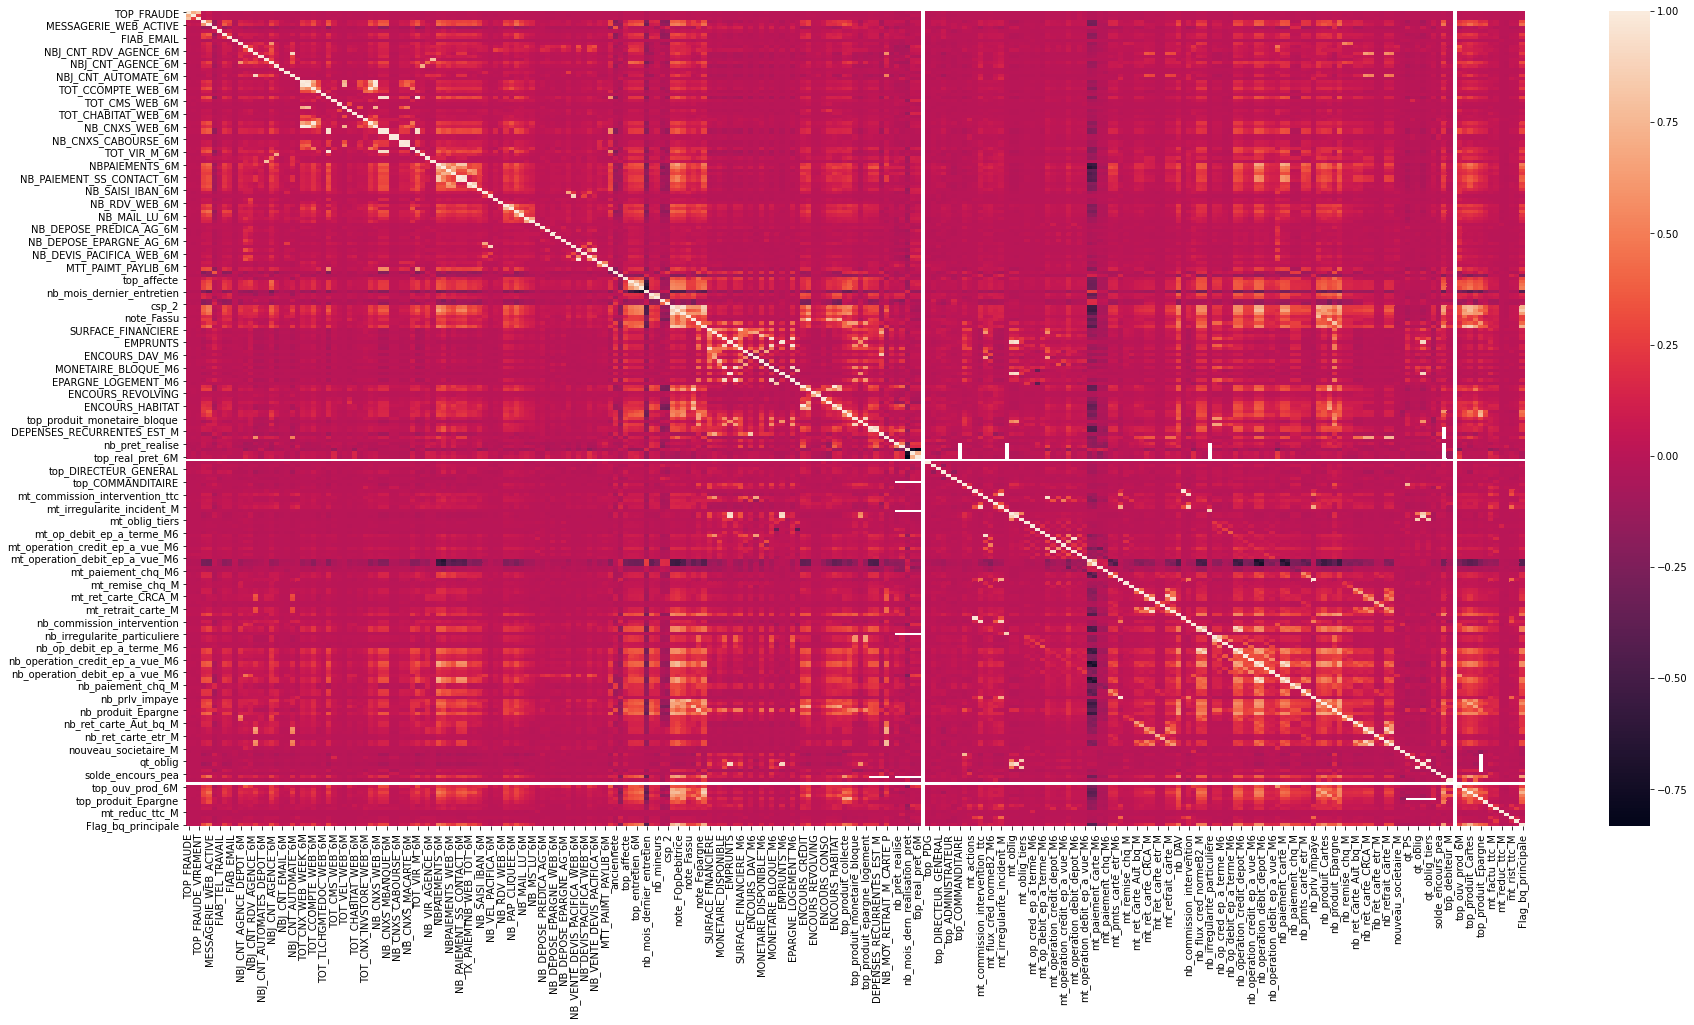

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(data_ech10.corr())

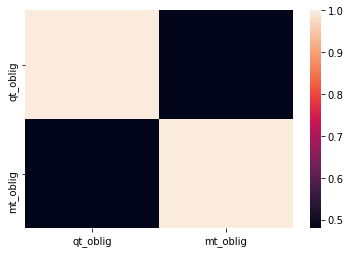

In [20]:
data_oblig = data_ech10[['qt_oblig', 'mt_oblig']]
sns.heatmap(data_oblig.corr())